# Project 2: Breakout Strategy
## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `helper`, `project_helper`, and `project_tests`. These are custom packages built to help you solve the problems.  The `helper` and `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

### Install Packages

In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (18.1)


In [1]:
!pip install -r requirements.txt

### Load Packages

In [2]:
import pandas as pd
import numpy as np
import helper
import project_helper
import project_tests

## Market Data
### Load Data
While using real data will give you hands on experience, it's doesn't cover all the topics we try to condense in one project. We'll solve this by creating new stocks. We've create a scenario where companies mining [Terbium](https://en.wikipedia.org/wiki/Terbium) are making huge profits. All the companies in this sector of the market are made up. They represent a sector with large growth that will be used for demonstration latter in this project.

In [3]:
!pwd

/Users/cronin/Documents/GitHub/edu&prof_projects_private/     Udacity_ai_for_trading - 2019/submitted_projects/p2_breakout_strategy


In [4]:
df_original = pd.read_csv('home/eod-quotemedia.csv', parse_dates=['date'], index_col=False)

# Add TB sector to the market
df = df_original
df = pd.concat([df] + project_helper.generate_tb_sector(df[df['ticker'] == 'AAPL']['date']), ignore_index=True)

close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
high = df.reset_index().pivot(index='date', columns='ticker', values='adj_high')
low = df.reset_index().pivot(index='date', columns='ticker', values='adj_low')

print('Loaded Data')

/Users/cronin/.local/share/virtualenvs/GitHub-xxslnM4B/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Loaded Data


### View Data
To see what one of these 2-d matrices looks like, let's take a look at the closing prices matrix.

In [7]:
close.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29.99418563,16.17609308,81.13821681,53.10917319,34.92447839,50.86319750,31.42538772,64.69409505,46.23500000,39.91336014,...,27.66879066,35.28892781,76.32080247,40.02387348,22.10666494,25.75338607,45.48038323,71.89882693,27.85858718,29.44789315
2013-07-02,29.65013670,15.81983388,80.72207258,54.31224742,35.42807578,50.69676639,31.27288084,64.71204071,46.03000000,39.86057632,...,27.54228410,35.05903252,76.60816761,39.96552964,22.08273998,25.61367511,45.40266113,72.93417195,28.03893238,28.57244125
2013-07-03,29.70518453,16.12794994,81.23729877,54.61204262,35.44486235,50.93716689,30.72565028,65.21451912,46.42000000,40.18607651,...,27.33445191,35.28008569,76.65042719,40.00442554,22.20236479,25.73475794,46.06329899,72.30145844,28.18131017,28.16838652
2013-07-05,30.43456826,16.21460758,81.82188233,54.17338125,35.85613355,51.37173702,31.32670680,66.07591068,47.00000000,40.65233352,...,27.69589920,35.80177117,77.39419581,40.67537968,22.58516418,26.06075017,46.41304845,73.16424628,29.39626730,29.02459772
2013-07-08,30.52402098,16.31089385,82.95141667,53.86579916,36.66188936,52.03746147,31.76628544,66.82065546,46.62500000,40.25645492,...,27.98505704,35.20050655,77.96892611,40.64620776,22.48946433,26.22840332,46.95062632,73.89282298,29.57661249,29.76536472


In [8]:
close.tail()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-06-26,58.57854478,48.36234805,121.52159207,143.57270901,70.35520945,94.31043377,47.95227368,120.09101209,144.96000000,78.92677572,...,42.76892496,65.99587865,78.12543603,63.56673975,27.95461459,54.05749897,73.49934641,127.97264293,41.75554533,62.43009343
2017-06-27,58.22256443,48.08474540,121.69121741,141.51491885,70.01668424,93.85848253,47.71697322,119.94376955,142.54000000,76.54633554,...,43.14151074,63.78164638,78.00041995,63.92391201,27.75350225,53.87954816,72.74212810,127.16946735,41.95278457,62.46990854
2017-06-28,58.73675827,48.82832394,116.45278767,143.58255490,70.52930812,94.69360982,47.53069368,121.46527575,143.81000000,77.58471685,...,43.30819385,64.67321778,78.40431807,64.82428373,28.28980181,54.34419748,72.91914017,127.42727680,42.37684891,62.65903032
2017-06-29,58.27398382,49.19515602,115.79424221,141.46568942,70.10373358,94.08445815,47.77579833,120.72906307,141.24000000,76.15449354,...,43.27877918,62.88027749,77.60613845,64.10898129,28.12560699,54.27499439,72.23075989,126.81250043,43.38276899,62.21111032
2017-06-30,58.77942143,49.88916265,116.33305213,141.80044954,70.13275003,92.87597984,47.65814810,121.40637874,141.44000000,76.21326984,...,42.94541296,63.01744232,77.63498832,64.41695873,27.74892476,54.79896064,72.53561401,127.31820357,43.30387330,62.09166499


### Stock Example
Let's see what a single stock looks like from the closing prices. For this example and future display examples in this project, we'll use Apple's stock (AAPL). If we tried to graph all the stocks, it would be too much information.

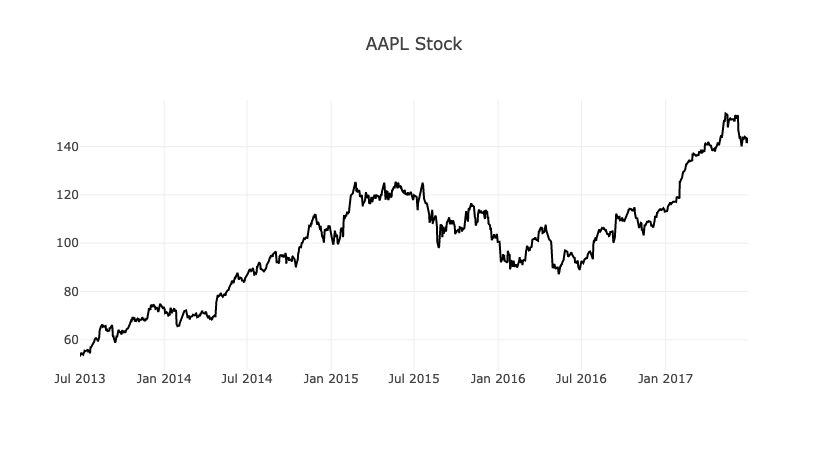

In [9]:
apple_ticker = 'AAPL'
project_helper.plot_stock(close[apple_ticker], '{} Stock'.format(apple_ticker))

## The Alpha Research Process

In this project you will code and evaluate a "breakout" signal. It is important to understand where these steps fit in the alpha research workflow. The signal-to-noise ratio in trading signals is very low and, as such, it is very easy to fall into the trap of _overfitting_ to noise. It is therefore inadvisable to jump right into signal coding. To help mitigate overfitting, it is best to start with a general observation and hypothesis; i.e., you should be able to answer the following question _before_ you touch any data:

> What feature of markets or investor behaviour would lead to a persistent anomaly that my signal will try to use?

Ideally the assumptions behind the hypothesis will be testable _before_ you actually code and evaluate the signal itself. The workflow therefore is as follows:

![image](images/alpha_steps.png)

In this project, we assume that the first three steps area done ("observe & research", "form hypothesis", "validate hypothesis"). The hypothesis you'll be using for this project is the following:
- In the absence of news or significant investor trading interest, stocks oscillate in a range.
- Traders seek to capitalize on this range-bound behaviour periodically by selling/shorting at the top of the range and buying/covering at the bottom of the range. This behaviour reinforces the existence of the range.
- When stocks break out of the range, due to, e.g., a significant news release or from market pressure from a large investor:
    - the liquidity traders who have been providing liquidity at the bounds of the range seek to cover their positions to mitigate losses, thus magnifying the move out of the range, _and_
    - the move out of the range attracts other investor interest; these investors, due to the behavioural bias of _herding_ (e.g., [Herd Behavior](https://www.investopedia.com/university/behavioral_finance/behavioral8.asp)) build positions which favor continuation of the trend.


Using this hypothesis, let start coding..
## Compute the Highs and Lows in a Window
You'll use the price highs and lows as an indicator for the breakout strategy. In this section, implement `get_high_lows_lookback` to get the maximum high price and minimum low price over a window of days. The variable `lookback_days` contains the number of days to look in the past. Make sure this doesn't include the current day.

In [10]:
def get_high_lows_lookback(high, low, lookback_days):
    """
    Get the highs and lows in a lookback window.
    
    Parameters
    ----------
    high : DataFrame
        High price for each ticker and date
    low : DataFrame
        Low price for each ticker and date
    lookback_days : int
        The number of days to look back. 2 in this case
    
    Returns
    -------
    lookback_high : DataFrame
        Lookback high price for each ticker and date
    lookback_low : DataFrame
        Lookback low price for each ticker and date
    """
    # .shift() start one day forward, look back # lookback_days (2), get max number
    lookback_high = high.rolling(window=lookback_days).max().shift()
    # .shift() start one day forward, look back # lookback_days (2), get min number
    lookback_low = low.rolling(window=lookback_days).min().shift()
    return (lookback_high, lookback_low)

project_tests.test_get_high_lows_lookback(get_high_lows_lookback)

Tests Passed


### View Data
Let's use your implementation of `get_high_lows_lookback` to get the highs and lows for the past 50 days and compare it to it their respective stock.  Just like last time, we'll use Apple's stock as the example to look at.

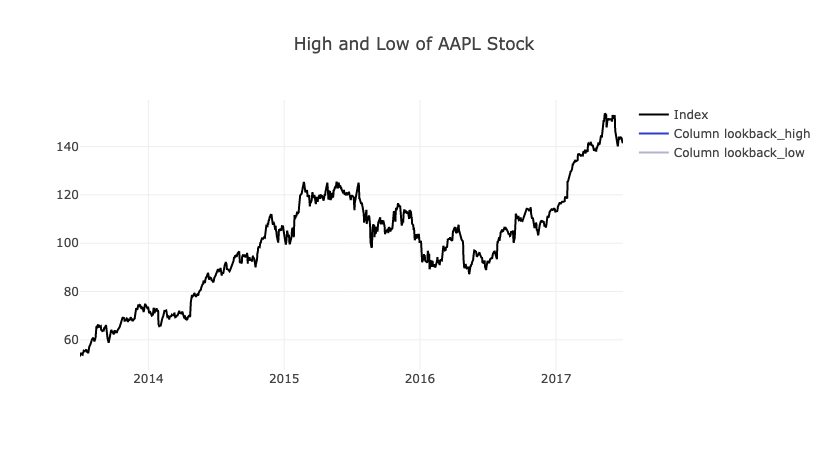

In [11]:
lookback_days = 50
lookback_high, lookback_low = get_high_lows_lookback(high, low, lookback_days)
project_helper.plot_high_low(
    close[apple_ticker],
    lookback_high[apple_ticker],
    lookback_low[apple_ticker],
    'High and Low of {} Stock'.format(apple_ticker))

## Compute Long and Short Signals
Using the generated indicator of highs and lows, create long and short signals using a breakout strategy. Implement `get_long_short` to generate the following signals:

| Signal | Condition |
|----|------|
| -1 | Low > Close Price |
| 1  | High < Close Price |
| 0  | Otherwise |

In this chart, **Close Price** is the `close` parameter. **Low** and **High** are the values generated from `get_high_lows_lookback`, the `lookback_high` and `lookback_low` parameters.

In [72]:
def get_long_short(close, lookback_high, lookback_low):
    """
    Generate the signals long, short, and do nothing.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookback_high : DataFrame
        Lookback high price for each ticker and date
    lookback_low : DataFrame
        Lookback low price for each ticker and date
    
    Returns
    -------
    long_short : DataFrame
        The long, short, and do nothing signals for each ticker and date
    """
    # if close - lookback_low is less than zero, then close price is less than low, so -1 long signal
    lows = (close - lookback_low).applymap(lambda x: -1 if x < 0 else np.nan) 
    # if close - lookback_high is greater than zero, then close price is greater than high, so 1 short signal
    highs = (close - lookback_high).applymap(lambda x: 1 if x > 0 else np.nan)
    # update lows df with highs df, don't overwrite, fill nans w/ zero, and make numbers integers
    lows.update(highs,overwrite=False)
    return lows.fillna(0).astype(int)

project_tests.test_get_long_short(get_long_short)

Tests Passed


### View Data
Let's compare the signals you generated against the close prices. This chart will show a lot of signals. Too many in fact. We'll talk about filtering the redundant signals in the next problem. 

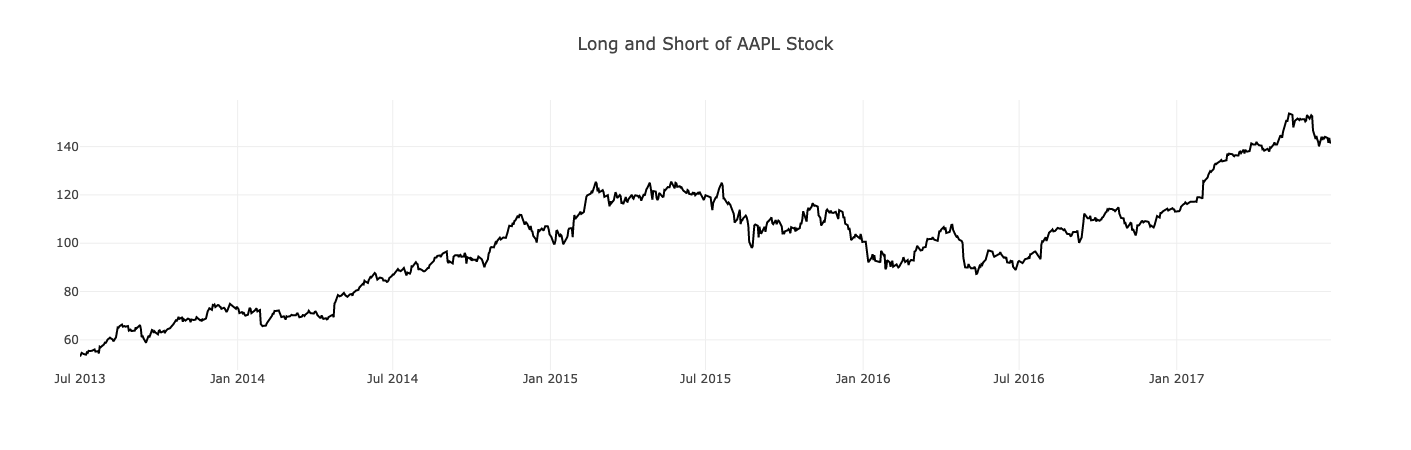

In [73]:
signal = get_long_short(close, lookback_high, lookback_low)
project_helper.plot_signal(
    close[apple_ticker],
    signal[apple_ticker],
    'Long and Short of {} Stock'.format(apple_ticker))

## Filter Signals
That was a lot of repeated signals! If we're already shorting a stock, having an additional signal to short a stock isn't helpful for this strategy. This also applies to additional long signals when the last signal was long.

Implement `filter_signals` to filter out repeated long or short signals within the `lookahead_days`. If the previous signal was the same, change the signal to `0` (do nothing signal). For example, say you have a single stock time series that is

`[1, 0, 1, 0, 1, 0, -1, -1]`

Running `filter_signals` with a lookahead of 3 days should turn those signals into

`[1, 0, 0, 0, 1, 0, -1, 0]`

To help you implement the function, we have provided you with the `clear_signals` function. This will remove all signals within a window after the last signal. For example, say you're using a windows size of 3 with `clear_signals`. It would turn the Series of long signals

`[0, 1, 0, 0, 1, 1, 0, 1, 0]`

into

`[0, 1, 0, 0, 0, 1, 0, 0, 0]`

`clear_signals` only takes a Series of the same type of signals, where `1` is the signal and `0` is no signal. It can't take a mix of long and short signals. Using this function, implement `filter_signals`. 

For implementing `filter_signals`, we don't reccommend you try to find a vectorized solution. Instead, you should use the [`iterrows`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.iterrows.html) over each column.

In [12]:
def clear_signals(signals, window_size):
    """
    Clear out signals in a Series of just long or short signals.
    
    Remove the number of signals down to 1 within the window size time period.
    
    Parameters
    ----------
    signals : Pandas Series
        The long, short, or do nothing signals
    window_size : int
        The number of days to have a single signal       
    
    Returns
    -------
    signals : Pandas Series
        Signals with the signals removed from the window size
    """
    # Start with buffer of window size
    # This handles the edge case of calculating past_signal in the beginning
    clean_signals = [0]*window_size
    
    for signal_i, current_signal in enumerate(signals):
        # Check if there was a signal in the past window_size of days
        has_past_signal = bool(sum(clean_signals[signal_i:signal_i+window_size]))
        # Use the current signal if there's no past signal, else 0/False
        clean_signals.append(not has_past_signal and current_signal)
        
    # Remove buffer
    clean_signals = clean_signals[window_size:]

    # Return the signals as a Series of Ints
    return pd.Series(np.array(clean_signals).astype(np.int), signals.index)

def filter_signals(signal, lookahead_days):
    """
    Filter out signals in a DataFrame.
    
    Parameters
    ----------
    signal : DataFrame
        The long, short, and do nothing signals for each ticker and date
    lookahead_days : int
        The number of days to look ahead
    
    Returns
    -------
    filtered_signal : DataFrame
        The filtered long, short, and do nothing signals for each ticker and date
    
    """
    filtered_signal = pd.DataFrame()
    #Make a copy of the signal dataframe using copy()
    signal = signal.copy()
    #Iterate over the transposed signal using iterrows as follows:
    for ticker, ticker_signals in signal.T.iterrows():
        #make a copy of the ticker_Signals and store it as long_signals
        long_signals = ticker_signals.copy()
        #query the long_signals and filter out rows where long_signals==-1 and assign them 0
        long_signals = long_signals.replace(-1,0)
        #make a copy of the ticker_Signals and store it as short_signals
        short_signals = ticker_signals.copy()
        #query the short_signals and filter out rows where short_signals==1 and assign them 0
        short_signals = short_signals.replace(1,0)
        # make use of clear_signals and pass long_signals & lookahead days as args to it 
        long_with_clear = clear_signals(long_signals, lookahead_days)
        # makeuse of clear_signals and pass short_signal and lookahead days as args to it 
        short_with_clear = clear_signals(short_signals, lookahead_days)
        # and store the sum obtained in filtered_signal[ticker]
        combined = long_with_clear.add(short_with_clear)
        filtered_signal[ticker] = pd.Series(combined)  
    return filtered_signal

project_tests.test_filter_signals(filter_signals)

Tests Passed


### View Data
Let's view the same chart as before, but with the redundant signals removed.

In [13]:
signal_5 = filter_signals(signal, 5)
signal_10 = filter_signals(signal, 10)
signal_20 = filter_signals(signal, 20)
for signal_data, signal_days in [(signal_5, 5), (signal_10, 10), (signal_20, 20)]:
    project_helper.plot_signal(
        close[apple_ticker],
        signal_data[apple_ticker],
        'Long and Short of {} Stock with {} day signal window'.format(apple_ticker, signal_days))

NameError: name 'signal' is not defined

## Lookahead Close Prices
With the trading signal done, we can start working on evaluating how many days to short or long the stocks. In this problem, implement `get_lookahead_prices` to get the close price days ahead in time. You can get the number of days from the variable `lookahead_days`. We'll use the lookahead prices to calculate future returns in another problem.

In [14]:
def get_lookahead_prices(close, lookahead_days):
    """
    Get the lookahead prices for `lookahead_days` number of days.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookahead_days : int
        The number of days to look ahead
    
    Returns
    -------
    lookahead_prices : DataFrame
        The lookahead prices for each ticker and date
    """
    # On a given date, will get the close price the # of lookahead days from that date
    # by shifting the close prices back (negative) by the # of lookahead days
    lookahead_prices = close.shift(-lookahead_days)
    return lookahead_prices

project_tests.test_get_lookahead_prices(get_lookahead_prices)

Tests Passed


### View Data
Using the `get_lookahead_prices` function, let's generate lookahead closing prices for 5, 10, and 20 days.

Let's also chart a subsection of a few months of the Apple stock instead of years. This will allow you to view the differences between the 5, 10, and 20 day lookaheads. Otherwise, they will mesh together when looking at a chart that is zoomed out.

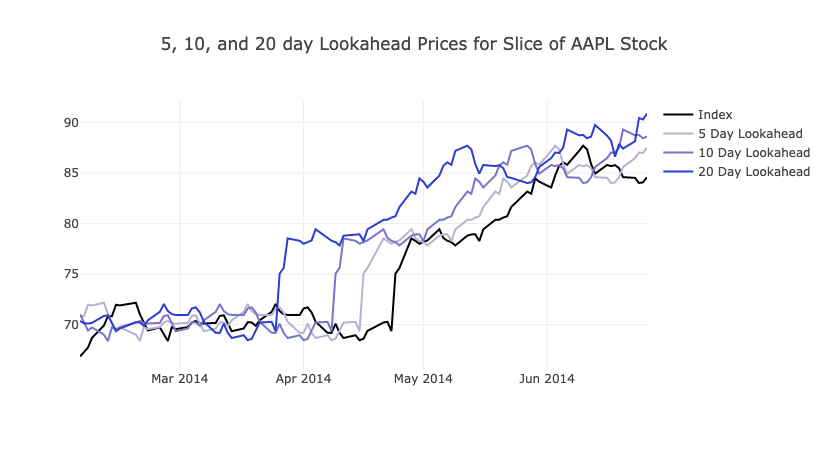

In [15]:
lookahead_5 = get_lookahead_prices(close, 5)
lookahead_10 = get_lookahead_prices(close, 10)
lookahead_20 = get_lookahead_prices(close, 20)
project_helper.plot_lookahead_prices(
    close[apple_ticker].iloc[150:250],
    [
        (lookahead_5[apple_ticker].iloc[150:250], 5),
        (lookahead_10[apple_ticker].iloc[150:250], 10),
        (lookahead_20[apple_ticker].iloc[150:250], 20)],
    '5, 10, and 20 day Lookahead Prices for Slice of {} Stock'.format(apple_ticker))

## Lookahead Price Returns
Implement `get_return_lookahead` to generate the log price return between the closing price and the lookahead price.

In [16]:
def get_return_lookahead(close, lookahead_prices):
    """
    Calculate the log returns from the lookahead days to the signal day.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookahead_prices : DataFrame
        The lookahead prices for each ticker and date. 2 days forward
    
    Returns
    -------
    lookahead_returns : DataFrame
        The lookahead log returns for each ticker and date
    """
    # log return of the lookahead price two days foward and the current date's close price
    log_returns = np.log(lookahead_prices/close)
    return log_returns

project_tests.test_get_return_lookahead(get_return_lookahead)

Tests Passed


### View Data
Using the same lookahead prices and same subsection of the Apple stock from the previous problem, we'll view the lookahead returns.

In order to view price returns on the same chart as the stock, a second y-axis will be added. When viewing this chart, the axis for the price of the stock will be on the left side, like previous charts. The axis for price returns will be located on the right side.

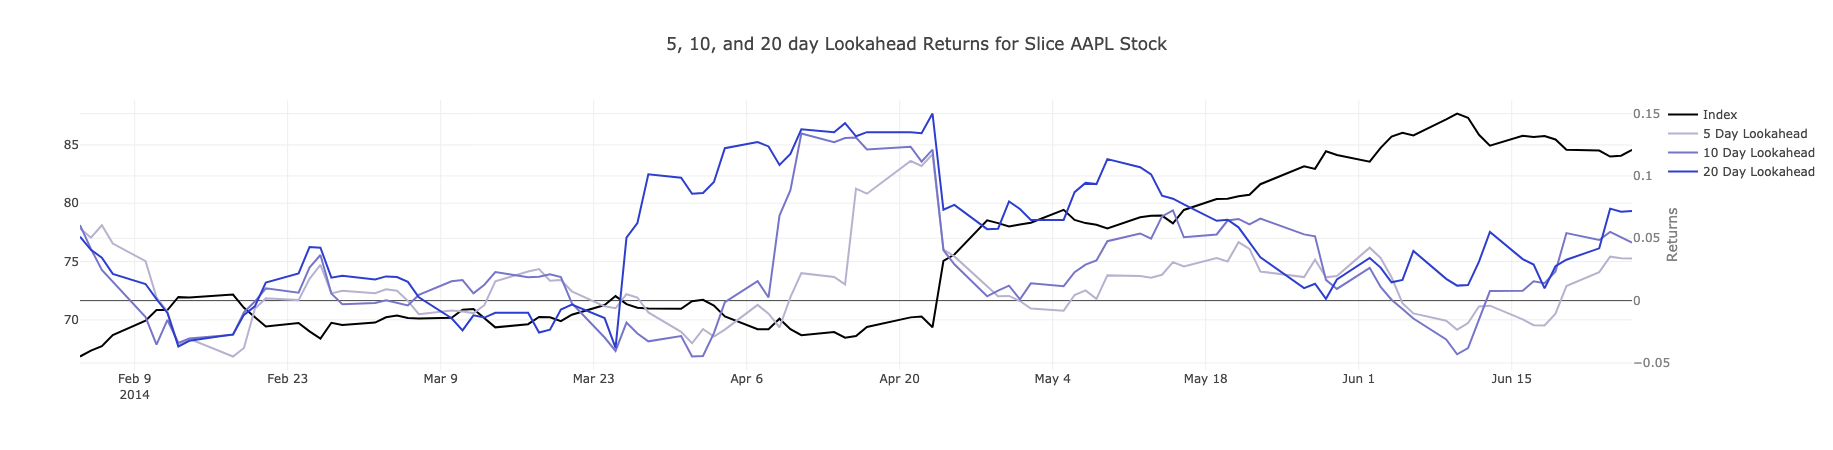

In [22]:
price_return_5 = get_return_lookahead(close, lookahead_5)
price_return_10 = get_return_lookahead(close, lookahead_10)
price_return_20 = get_return_lookahead(close, lookahead_20)
project_helper.plot_price_returns(
    close[apple_ticker].iloc[150:250],
    [
        (price_return_5[apple_ticker].iloc[150:250], 5),
        (price_return_10[apple_ticker].iloc[150:250], 10),
        (price_return_20[apple_ticker].iloc[150:250], 20)],
    '5, 10, and 20 day Lookahead Returns for Slice {} Stock'.format(apple_ticker))

## Compute the Signal Return
Using the price returns generate the signal returns.

In [17]:
def get_signal_return(signal, lookahead_returns):
    """
    Compute the signal returns.
    
    Parameters
    ----------
    signal : DataFrame
        The long, short, and do nothing signals for each ticker and date
    lookahead_returns : DataFrame
        The lookahead log returns for each ticker and date
    
    Returns
    -------
    signal_return : DataFrame
        Signal returns for each ticker and date
    """
    # multiplies the signals (either -1,0,1) by the lookahead_returns for each date
    signal_return = signal * lookahead_returns
    return signal_return

project_tests.test_get_signal_return(get_signal_return)

Tests Passed


### View Data
Let's continue using the previous lookahead prices to view the signal returns. Just like before, the axis for the signal returns is on the right side of the chart.

In [18]:
title_string = '{} day LookaheadSignal Returns for {} Stock'
signal_return_5 = get_signal_return(signal_5, price_return_5)
signal_return_10 = get_signal_return(signal_10, price_return_10)
signal_return_20 = get_signal_return(signal_20, price_return_20)
project_helper.plot_signal_returns(
    close[apple_ticker],
    [
        (signal_return_5[apple_ticker], signal_5[apple_ticker], 5),
        (signal_return_10[apple_ticker], signal_10[apple_ticker], 10),
        (signal_return_20[apple_ticker], signal_20[apple_ticker], 20)],
    [title_string.format(5, apple_ticker), title_string.format(10, apple_ticker), title_string.format(20, apple_ticker)])

NameError: name 'signal_5' is not defined

## Test for Significance
### Histogram
Let's plot a histogram of the signal return values.

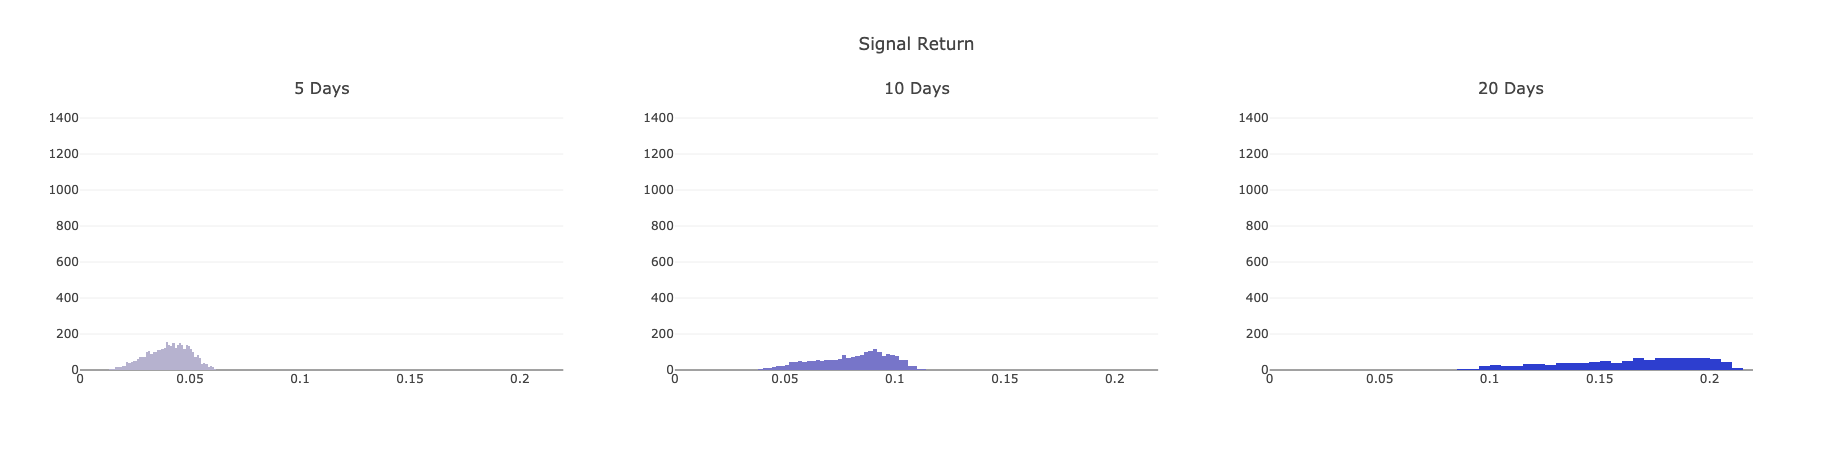

In [25]:
project_helper.plot_signal_histograms(
    [signal_return_5, signal_return_10, signal_return_20],
    'Signal Return',
    ('5 Days', '10 Days', '20 Days'))

### Question: What do the histograms tell you about the signal returns?

Answer: The histograms tell us that the signal returns for 5,10,20 days look normally distributed centered around a mean of zero. The histograms shows the standard deviations of each are different based on the height, with 20 days having the largest standard deviation (more spread out). The histograms also shows outliers in the right tails depicted as a second "bump" in each plot.

## Outliers
You might have noticed the outliers in the 10 and 20 day histograms. To better visualize the outliers, let's compare the 5, 10, and 20 day signals returns to normal distributions with the same mean and deviation for each signal return distributions.

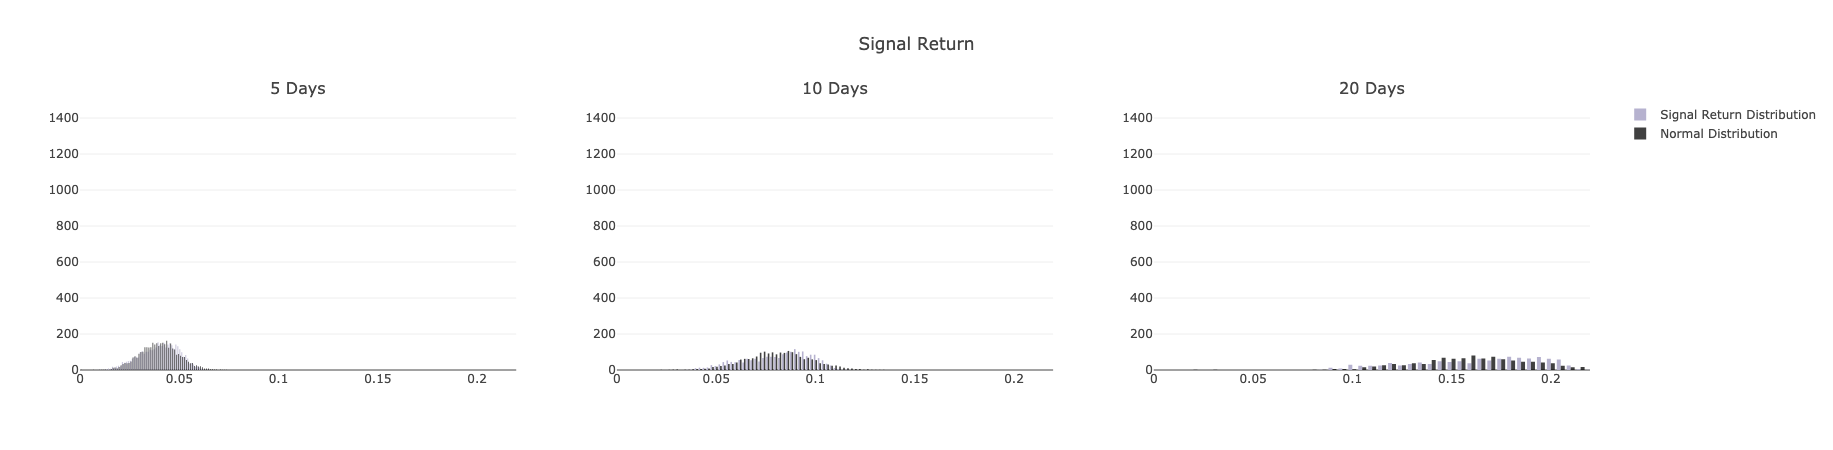

In [26]:
project_helper.plot_signal_to_normal_histograms(
    [signal_return_5, signal_return_10, signal_return_20],
    'Signal Return',
    ('5 Days', '10 Days', '20 Days'))

## Kolmogorov-Smirnov Test
While you can see the outliers in the histogram, we need to find the stocks that are causing these outlying returns. We'll use the Kolmogorov-Smirnov Test or KS-Test. This test will be applied to teach ticker's signal returns where a long or short signal exits.

In [27]:
# Filter out returns that don't have a long or short signal.
long_short_signal_returns_5 = signal_return_5[signal_5 != 0].stack()
long_short_signal_returns_10 = signal_return_10[signal_10 != 0].stack()
long_short_signal_returns_20 = signal_return_20[signal_20 != 0].stack()

# Get just ticker and signal return
long_short_signal_returns_5 = long_short_signal_returns_5.reset_index().iloc[:, [1,2]]
long_short_signal_returns_5.columns = ['ticker', 'signal_return']
long_short_signal_returns_10 = long_short_signal_returns_10.reset_index().iloc[:, [1,2]]
long_short_signal_returns_10.columns = ['ticker', 'signal_return']
long_short_signal_returns_20 = long_short_signal_returns_20.reset_index().iloc[:, [1,2]]
long_short_signal_returns_20.columns = ['ticker', 'signal_return']

# View some of the data
long_short_signal_returns_5.head(10)

,ticker,signal_return
0,ALTAIC,0.02158090
1,ARMENA,0.03094022
2,BIFLOR,0.02218699
3,DASYST,0.02671404
4,GESNER,0.02555347
5,GREIGI,0.02463412
6,KAUFMA,0.02243817
7,ORPHAN,0.02038999
8,PRAEST,0.02432832
9,URUMIE,0.01779414


This gives you the data to use in the KS-Test.

Now it's time to implement the function `calculate_kstest` to use Kolmogorov-Smirnov test (KS test) between a normal distribution and each stock's signal returns. Run KS test on a normal distribution against each stock's signal returns. Use [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html#scipy-stats-kstest) perform the KS test. When calculating the standard deviation of the signal returns, make sure to set the delta degrees of freedom to 0.

For this function, we don't reccommend you try to find a vectorized solution. Instead, you should iterate over the [`groupby`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html) function.

In [28]:
from scipy.stats import kstest


def calculate_kstest(long_short_signal_returns):
    """
    Calculate the KS-Test against the signal returns with a long or short signal.
    
    Parameters
    ----------
    long_short_signal_returns : DataFrame
        The signal returns which have a signal.
        This DataFrame contains two columns, "ticker" and "signal_return"
    
    Returns
    -------
    ks_values : Pandas Series
        KS static for all the tickers
    p_values : Pandas Series
        P value for all the tickers
    """
    lssr_mean = np.mean(long_short_signal_returns)
    lssr_std = np.std(long_short_signal_returns, ddof=0)
    ks_values = []
    p_values = []
    column = []
    for name, group in long_short_signal_returns.groupby('ticker'):
        sub_group = group['signal_return']
        params = (lssr_mean, lssr_std)
        ks,p = kstest(sub_group,'norm',args = params)
        ks_values.append(ks)
        p_values.append(p)
        column.append(name)
    ks_series = pd.Series(ks_values)
    ks_series.index = column 
    p_series = pd.Series(p_values)
    p_series.index = column 
    return ks_series, p_series

project_tests.test_calculate_kstest(calculate_kstest)

Tests Passed


### View Data
Using the signal returns we created above, let's calculate the ks and p values.

In [29]:
ks_values_5, p_values_5 = calculate_kstest(long_short_signal_returns_5)
ks_values_10, p_values_10 = calculate_kstest(long_short_signal_returns_10)
ks_values_20, p_values_20 = calculate_kstest(long_short_signal_returns_20)

print('ks_values_5')
print(ks_values_5.head(10))
print('p_values_5')
print(p_values_5.head(10))

ks_values_5
AGENEN   0.04742371
ALTAIC   0.05622181
ARMENA   0.07944365
BAKERI   0.08439079
BIFLOR   0.10148963
CLUSIA   0.12223910
DASYST   0.05219017
GESNER   0.04727419
GREIGI   0.06722350
HUMILI   0.07079264
dtype: float64
p_values_5
AGENEN   0.87670721
ALTAIC   0.72361195
ARMENA   0.26812044
BAKERI   0.21076340
BIFLOR   0.07649951
CLUSIA   0.01832234
DASYST   0.79238103
GESNER   0.88144141
GREIGI   0.47143048
HUMILI   0.39962973
dtype: float64


## Find Outliers
With the ks and p values calculate, let's find which symbols are the outliers. Implement the `find_outliers` function to find the following outliers:
- Symbols that pass the null hypothesis with a p-value less than `pvalue_threshold`.
- Symbols that with a KS value above `ks_threshold`.

In [30]:
def find_outliers(ks_values, p_values, ks_threshold, pvalue_threshold=0.05):
    """
    Find outlying symbols using KS values and P-values
    
    Parameters
    ----------
    ks_values : Pandas Series
        KS static for all the tickers
    p_values : Pandas Series
        P value for all the tickers
    ks_threshold : float
        The threshold for the KS statistic
    pvalue_threshold : float
        The threshold for the p-value
    
    Returns
    -------
    outliers : set of str
        Symbols that are outliers
    """
    df = pd.concat([ks_values, p_values], axis=1)
    df.columns = ['ks_values', 'p_values']
    outliers = df[(df['ks_values'] > ks_threshold) & (df['p_values'] < pvalue_threshold)]
    outlier_tickers = outliers.index.values 
    return set(outlier_tickers)

project_tests.test_find_outliers(find_outliers)

Tests Passed


### View Data
Using the `find_outliers` function you implemented, let's see what we found.

In [31]:
ks_threshold = 0.8
outliers_5 = find_outliers(ks_values_5, p_values_5, ks_threshold)
outliers_10 = find_outliers(ks_values_10, p_values_10, ks_threshold)
outliers_20 = find_outliers(ks_values_20, p_values_20, ks_threshold)

outlier_tickers = outliers_5.union(outliers_10).union(outliers_20)
print('{} Outliers Found:\n{}'.format(len(outlier_tickers), ', '.join(list(outlier_tickers))))

0 Outliers Found:



### Show Significance without Outliers
Let's compare the 5, 10, and 20 day signals returns without outliers to normal distributions. Also, let's see how the P-Value has changed with the outliers removed.

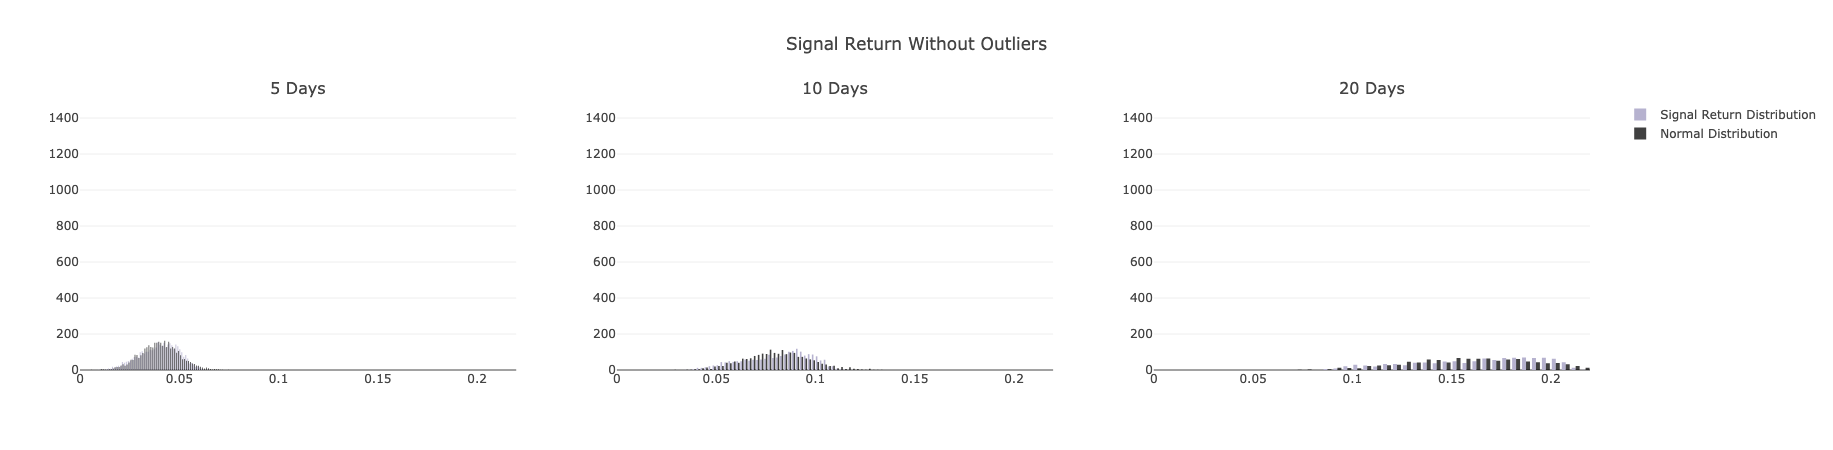

In [32]:
good_tickers = list(set(close.columns) - outlier_tickers)

project_helper.plot_signal_to_normal_histograms(
    [signal_return_5[good_tickers], signal_return_10[good_tickers], signal_return_20[good_tickers]],
    'Signal Return Without Outliers',
    ('5 Days', '10 Days', '20 Days'))

That's more like it! The returns are closer to a normal distribution. You have finished the research phase of a Breakout Strategy. You can now submit your project.
## Submission
Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.